In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import os
from pathlib import Path

import aps
from aps.ai.autoalignment.common.facade.parameters import ExecutionMode, DistanceUnits
from aps.ai.autoalignment.common.simulation.facade.parameters import Implementors
from aps.ai.autoalignment.beamline34IDC.facade.focusing_optics_factory import focusing_optics_factory_method
from aps.ai.autoalignment.beamline34IDC.simulation.facade.focusing_optics_interface import get_default_input_features
from aps.ai.autoalignment.common.util.shadow.common import plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution, load_shadow_beam, PreProcessorFiles
from aps.ai.autoalignment.common.util import clean_up
from aps.ai.autoalignment.common.util.wrappers import PlotMode
from aps.ai.autoalignment.common.facade.parameters import DistanceUnits, Movement, AngularUnits


In [9]:
from epics import ca
ca.finalize_libca()

In [10]:
%matplotlib inline

In [11]:
root_dir = Path(aps.__file__).parents[1]
work_dir = root_dir / 'work_directory/34-ID'
os.chdir(work_dir)
print(work_dir)

/Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID


In [22]:
clean_up()

In [27]:
verbose=False
input_beam = load_shadow_beam("primary_optics_system_beam.dat")
input_features = get_default_input_features()

# Focusing Optics System -------------------------

focusing_system = focusing_optics_factory_method(execution_mode=ExecutionMode.SIMULATION, implementor=Implementors.SHADOW, bender=1)

input_features = get_default_input_features()

In [28]:
input_features.set_parameter("coh_slits_h_aperture", 0.03)
input_features.set_parameter("coh_slits_v_aperture", 0.07)
input_features.set_parameter("vkb_motor_1_bender_position", 138.0)
input_features.set_parameter("vkb_motor_2_bender_position", 243.5)
input_features.set_parameter("hkb_motor_1_bender_position", 215.5)
input_features.set_parameter("hkb_motor_2_bender_position", 110.5)

In [29]:

focusing_system.initialize(input_photon_beam=input_beam,
                           input_features=input_features,
                           power=1,
                           rewrite_preprocessor_files=PreProcessorFiles.NO,
                           rewrite_height_error_profile_files=False)

write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID/Upstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID/Downstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID/Upstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID/Downstream_HKB_bender_profile.dat written to disk.


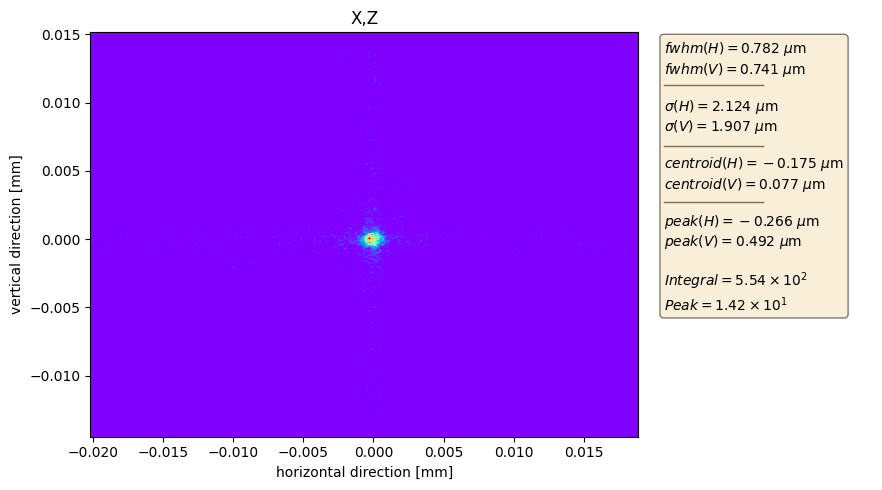

In [30]:

output_beam = focusing_system.get_photon_beam(verbose=verbose, near_field_calculation=True, debug_mode=False, random_seed=random_seed)

hist = get_shadow_beam_spatial_distribution

plot_shadow_beam_spatial_distribution(output_beam)
#plot_shadow_beam_spatial_distribution(output_beam, xrange=ranges[0], yrange=ranges[1], plot_mode=PlotMode.INTERNAL)


In [31]:
hist

<function aps.ai.autoalignment.common.util.shadow.common.get_shadow_beam_spatial_distribution(shadow_beam, nbins_h=201, nbins_v=201, nolost=1, xrange=None, yrange=None, do_gaussian_fit=False, add_noise=False, noise=None, percentage_fluctuation=0.1, calculate_over_noise=False, noise_threshold=1.5)>

In [16]:
print("Initial V-KB bender positions and q (up, down) ",
      focusing_system.get_vkb_motor_1_bender(units=DistanceUnits.MICRON),
      focusing_system.get_vkb_motor_2_bender(units=DistanceUnits.MICRON),
      focusing_system.get_vkb_q_distance())
print("Initial H-KB bender positions and q (up, down)",
      focusing_system.get_hkb_motor_1_bender(units=DistanceUnits.MICRON),
      focusing_system.get_hkb_motor_2_bender(units=DistanceUnits.MICRON),
      focusing_system.get_hkb_q_distance())

Initial V-KB bender positions and q (up, down)  138.0 243.50000000000006 (231.97550338684235, 230.47847331059276)
Initial H-KB bender positions and q (up, down) 215.5 110.49999999999999 (122.86446206866894, 123.79684937018354)


In [17]:
# ----------------------------------------------------------------
# perturbation of the incident beam to make adjustements necessary

random_seed = 2120 # for repeatability

focusing_system.perturbate_input_photon_beam(shift_h=0.0, shift_v=0.0)

output_beam = focusing_system.get_photon_beam(verbose=verbose, near_field_calculation=True, debug_mode=False, random_seed=random_seed)

plot_shadow_beam_spatial_distribution(output_beam, nbins=201, xrange=[-0.005, 0.005], yrange=[-0.005, 0.005], plot_mode=PlotMode.NATIVE)
plot_shadow_beam_spatial_distribution(output_beam, nbins=201, xrange=[-0.005, 0.005], yrange=[-0.005, 0.005], plot_mode=PlotMode.INTERNAL)

_, dt = get_shadow_beam_spatial_distribution(output_beam, nbins=201, xrange=[-0.005, 0.005], yrange=[-0.005, 0.005])

print("Initial Sigma (HxV): ", round(dt.get_parameter("h_sigma")*1e6, 0), " x ", round(dt.get_parameter("v_sigma")*1e6, 0), " nm")

write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID/Upstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID/Downstream_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID/Raytracing_VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID/Upstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID/Downstream_HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID/Raytracing_HKB_bender_profile.dat written to disk.


TypeError: plot_shadow_beam_spatial_distribution() got an unexpected keyword argument 'nbins'

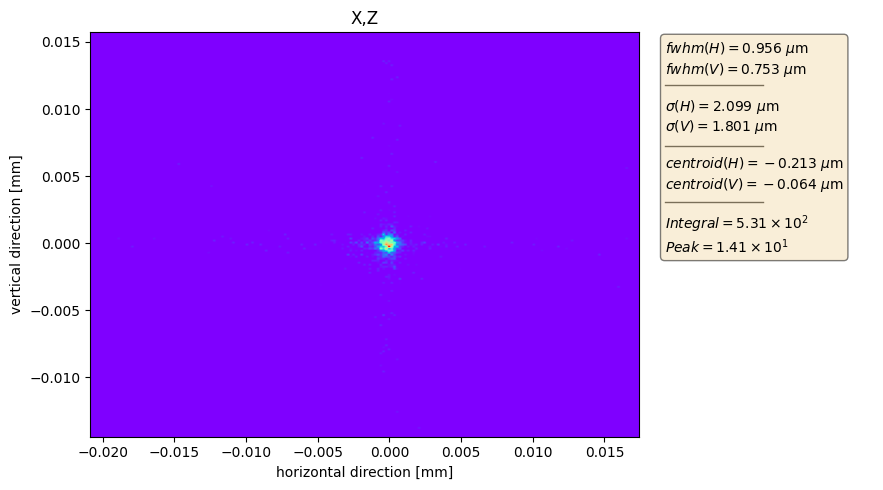

In [11]:
focusing_system.move_vkb_motor_3_pitch(0.00001, movement=Movement.RELATIVE, units=AngularUnits.MILLIRADIANS)



plot_shadow_beam_spatial_distribution(focusing_system.get_photon_beam(verbose=verbose, near_field_calculation=False, debug_mode=False, random_seed=random_seed),
                                      xrange=None, yrange=None);

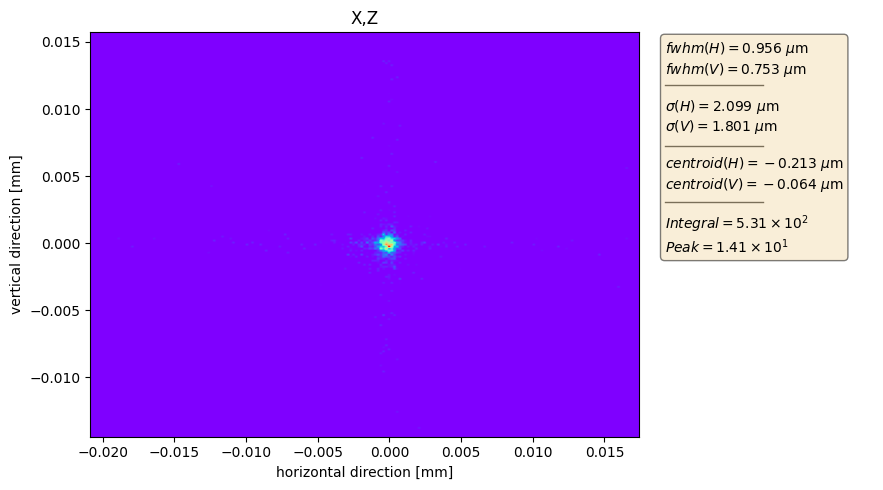

In [12]:
focusing_system.move_vkb_motor_1_bender(0.1, movement=Movement.RELATIVE, units=AngularUnits.MILLIRADIANS)



plot_shadow_beam_spatial_distribution(focusing_system.get_photon_beam(verbose=verbose, near_field_calculation=False, debug_mode=False, random_seed=random_seed),
                                      xrange=None, yrange=None);

In [13]:
clean_up()
